### 1. Purpose of this notebook

The purpose of this notebook is to explore customers who would agree to buy the gadget (sixth campaign).

how the CMO was interested in understand and study the characteristics of customers who are willing to buy the gadget, we created this notebook.

Basically, it contains the same reviews as the customers notebook, however, here we do not put our comments, conclusions and insights.

We observed some differences between the general profile of customers and the profile of customers who responded to the pilot campaign. However, in order not to sacrifice better quality in the transformation and in the predictive model, we do not prioritize going deeper into the study of these customers.

### 2. Read data

#### 2.1 Import Python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

import src.data_visualization as dv
import src.eda as eda
from src.paths import DATA

%matplotlib inline
plt.style.use('bmh')

%load_ext autoreload
%autoreload 2

In [6]:
dtypes = {'ID': str}
columns = ['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Age', 'MntTotal', 'NumTotalPurchases',
       'AcceptedTotalFirstFiveCmps', 'AcceptedTotalFirstFiveCmpsMorePilot', 'TotalYearAfterRegistration', 'TotalChildren', 
           'DaysOfRegistration', 'NumTotalPurchasesByMonthRegistred', 'PurchaseEveryNDays', 'Response']

df = pd.read_csv(DATA / 'ml_project1_data_pre_processed.csv', dtype=dtypes, usecols=columns)

In [7]:
df = df.query('Response == 1')

#### 2.2 Sample data

In [8]:
df.sample(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Age,MntTotal,NumTotalPurchases,AcceptedTotalFirstFiveCmps,AcceptedTotalFirstFiveCmpsMorePilot,TotalYearAfterRegistration,TotalChildren,DaysOfRegistration,NumTotalPurchasesByMonthRegistred,PurchaseEveryNDays
677,8779,2n Cycle,Married,36145.0,1,0,13,56,4,76,...,35,154,8,1,2,7,1,379,0.633245,47.375000
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,63,1529,22,0,1,8,0,664,0.993976,30.181818
702,8029,Master,Single,90247.0,0,0,27,1184,32,352,...,32,1605,14,3,4,6,0,62,6.774194,4.428571
1262,5207,PhD,Married,53378.0,1,1,41,489,6,152,...,57,661,19,0,1,8,2,644,0.885093,33.894737
270,2379,Graduation,Single,69267.0,0,0,31,778,44,499,...,67,1489,12,0,1,8,0,646,0.557276,53.833333


### 3. Who are our customers or who are our principal customers (majority)?

#### Age

count    334.000000
mean      50.583832
std       12.398192
min       24.000000
25%       41.000000
50%       49.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64

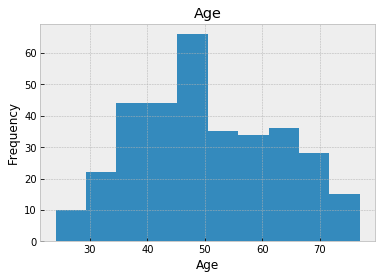

In [9]:
df.query("Age < 115")['Age'].hist(), plt.title('Age'), plt.ylabel('Frequency'), plt.xlabel('Age')
df.query("Age < 115")['Age'].describe()

#### Education

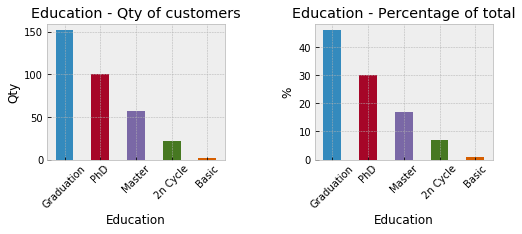

In [10]:
dv.qty_and_percentage(df, 'Education')

#### Marital_Status

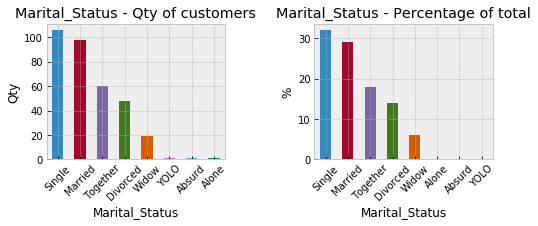

In [11]:
dv.qty_and_percentage(df, 'Marital_Status')

#### Kidhome

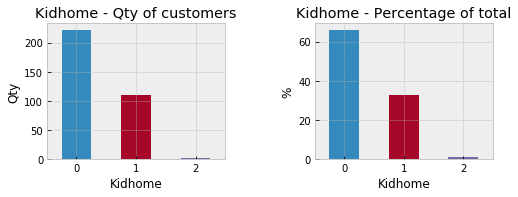

In [12]:
dv.qty_and_percentage(df, 'Kidhome', rotation=0)

#### Teenhome

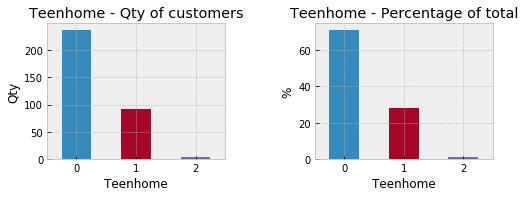

In [13]:
dv.qty_and_percentage(df, 'Teenhome', rotation=0)

#### Total children

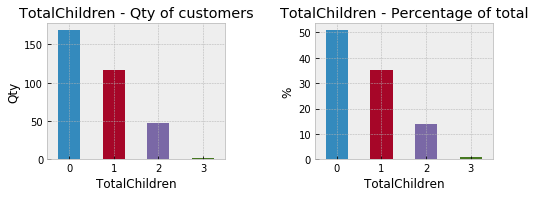

In [14]:
dv.qty_and_percentage(df, 'TotalChildren', rotation=0)

Most of our customers have more than 1 children (more than 70%).

#### Complain

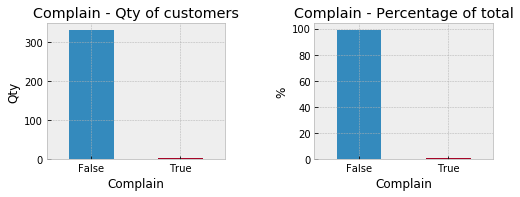

In [15]:
dv.qty_and_percentage(df, 'Complain', rotation=0)

#### Income

In [16]:
income_not_null_values = df[df['Income'].notnull()]['Income']

count       333.000000
mean      60209.675676
std       23194.080987
min        7500.000000
25%       39763.000000
50%       64090.000000
75%       80589.000000
max      105471.000000
Name: Income, dtype: float64

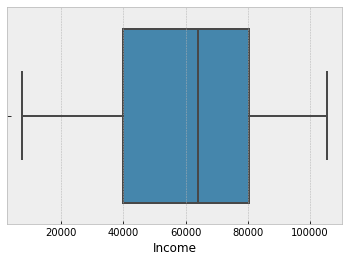

In [17]:
sns.boxplot(x=income_not_null_values)
income_not_null_values.describe()

In [18]:
q1, q3 = np.percentile(income_not_null_values, [25,75])
iqr = q3 - q1
income_lower_bound = q1 -(1.5 * iqr) 
income_upper_bound = q3 +(1.5 * iqr)

print(f'upper_bound: {income_upper_bound}')
df.query(f'Income > {income_upper_bound}')['Income']

upper_bound: 141828.0


Series([], Name: Income, dtype: float64)

Let's remove this customers and check again if there are some outliers.

count       333.000000
mean      60209.675676
std       23194.080987
min        7500.000000
25%       39763.000000
50%       64090.000000
75%       80589.000000
max      105471.000000
Name: Income, dtype: float64

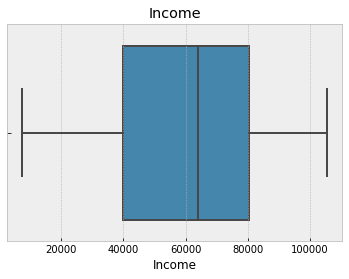

In [19]:
income_outliers_removed = income_not_null_values[income_not_null_values < income_upper_bound]

sns.boxplot(x=income_outliers_removed), plt.title('Income')
income_outliers_removed.describe()

#### Number of purchases

5134


count    334.000000
mean      15.371257
std        6.827775
min        3.000000
25%       10.000000
50%       16.000000
75%       21.000000
max       32.000000
Name: NumTotalPurchases, dtype: float64

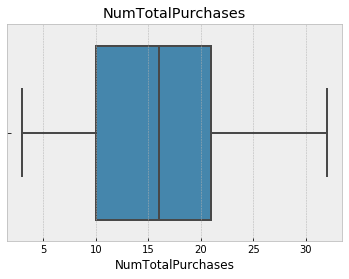

In [20]:
sns.boxplot(x=df['NumTotalPurchases']), plt.title('NumTotalPurchases')
print(df['NumTotalPurchases'].sum())
df['NumTotalPurchases'].describe()

####  Number of purchases by channel

In [21]:
num_purchases_by_channel = pd.DataFrame({'NumPurchases': df[['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].sum(),
                                        'Customers': df[['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].applymap(lambda x: 1 if x > 0 else 0).sum()})
bought_at_least_once_channels = pd.DataFrame(df[['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].applymap(lambda x: 1 if x > 0 else 0).sum(), columns=['BoughtAtLeastOnce'])

##### Bought at least once

In [22]:
(bought_at_least_once_channels
 .assign(Perc = np.multiply(bought_at_least_once_channels['BoughtAtLeastOnce'] / df['NumTotalPurchases']
                            .count(), 100)
         .round(2))
)

,BoughtAtLeastOnce,Perc
NumCatalogPurchases,312,93.41
NumStorePurchases,334,100.00
NumWebPurchases,333,99.70


##### Frequency

,Customers,NumPurchases,PercOfTotal,Avg
NumCatalogPurchases,312,1404,27.35,4.50
NumStorePurchases,334,2036,39.66,6.10
NumWebPurchases,333,1694,33.00,5.09


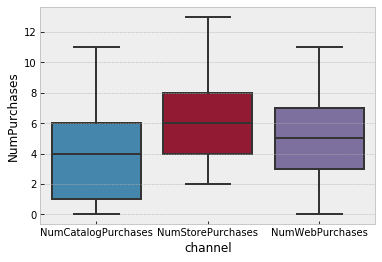

In [23]:
data = df[['ID','NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].melt('ID', var_name= 'channel', value_name='NumPurchases',)
sns.boxplot(data=data, x='channel', y='NumPurchases')

num_purchases_by_channel_resume = (num_purchases_by_channel.assign(PercOfTotal = np.multiply(num_purchases_by_channel['NumPurchases'] 
                                                   / num_purchases_by_channel['NumPurchases'].sum(), 100).round(2))
                                                            .assign(Avg = num_purchases_by_channel['NumPurchases'] 
                                                   / num_purchases_by_channel['Customers']).round(2))

num_purchases_by_channel_resume[['Customers', 'NumPurchases', 'PercOfTotal', 'Avg']]

##### Frequency by customer and by month (considering the registration date)

count    334.000000
mean      39.597782
std       35.057423
min        0.437500
25%       18.050000
50%       28.621345
75%       45.416667
max      208.333333
Name: PurchaseEveryNDays, dtype: float64

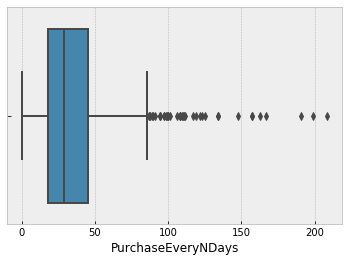

In [24]:
sns.boxplot(x=df['PurchaseEveryNDays']);
df['PurchaseEveryNDays'].describe()

There are a lot of outliers. Let's remove them and check again.

In [25]:
q1, q3 = np.percentile(df['PurchaseEveryNDays'], [25,75])
iqr = q3 - q1
PurchaseEveryNDays_lower_bound = q1 -(1.5 * iqr) 
PurchaseEveryNDays_upper_bound = q3 +(1.5 * iqr)

print(f'upper_bound: {PurchaseEveryNDays_upper_bound}')

upper_bound: 86.46666666666667


count    295.000000
mean      29.086181
std       17.609043
min        0.437500
25%       16.604762
50%       26.833333
75%       36.573529
max       85.428571
Name: PurchaseEveryNDays, dtype: float64

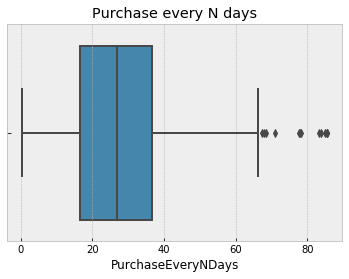

In [26]:
Purchase_every_days_outliers_removed = df.query(f'PurchaseEveryNDays < {PurchaseEveryNDays_upper_bound}')

sns.boxplot(x=Purchase_every_days_outliers_removed['PurchaseEveryNDays']), plt.title('Purchase every N days')
Purchase_every_days_outliers_removed['PurchaseEveryNDays'].describe()

Let's check by channel:

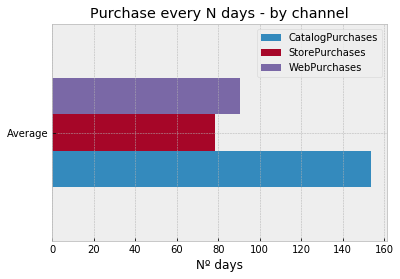

In [27]:
mean_NumCatalogPurchases = eda.purchase_every_N_days(Purchase_every_days_outliers_removed, 'NumCatalogPurchases').mean()
mean_NumStorePurchases = eda.purchase_every_N_days(Purchase_every_days_outliers_removed, 'NumStorePurchases').mean()
mean_NumWebPurchases = eda.purchase_every_N_days(Purchase_every_days_outliers_removed, 'NumWebPurchases').mean()

(pd.DataFrame({'CatalogPurchases':[mean_NumCatalogPurchases],
             'StorePurchases':[mean_NumStorePurchases],
             'WebPurchases':[mean_NumWebPurchases]}, index=['Average'])
 .plot
 .barh())
plt.xticks(rotation=0)
plt.xlabel('Nº days')
plt.title('Purchase every N days - by channel');

#### Deals purchases

In [28]:
np.multiply((df[df['NumDealsPurchases']>0]['NumDealsPurchases'].count() / 2240), 100).round(2)

14.2

count    334.000000
mean       0.206993
std        0.189592
min        0.000000
25%        0.052632
50%        0.121324
75%        0.375000
max        0.714286
dtype: float64

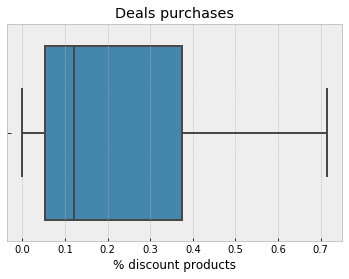

In [29]:
sns.boxplot(x=(df['NumDealsPurchases'] / df['NumTotalPurchases'])), plt.title('Deals purchases'), plt.xlabel("% discount products")
(df['NumDealsPurchases'] / df['NumTotalPurchases']).describe()

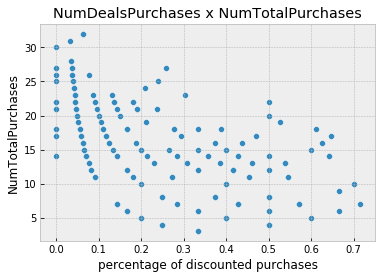

In [30]:
sns.scatterplot(x=df['NumDealsPurchases'] / df['NumTotalPurchases'], y=df['NumTotalPurchases']), 
plt.title('NumDealsPurchases x NumTotalPurchases') 
plt.xlabel('percentage of discounted purchases');

#### Visits website last month

In [31]:
bought_at_least_once_WebVisits = df['NumWebVisitsMonth'].apply(lambda x: 1 if x > 0 else 0).sum()
[bought_at_least_once_WebVisits, (bought_at_least_once_WebVisits / df['NumWebVisitsMonth'].count() * 100).round(1)]

[334, 100.0]

count    334.000000
mean       5.293413
std        2.569891
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: NumWebVisitsMonth, dtype: float64

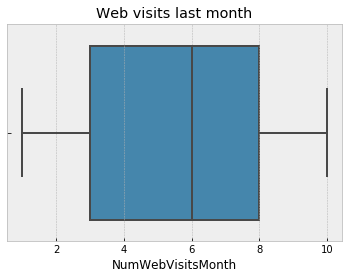

In [32]:
sns.boxplot(x=df['NumWebVisitsMonth']), plt.title('Web visits last month')
df['NumWebVisitsMonth'].describe()

#### Amount spent

count     334.000000
mean      925.946108
std       698.429033
min        14.000000
25%       219.500000
50%       965.500000
75%      1517.000000
max      2491.000000
Name: MntTotal, dtype: float64

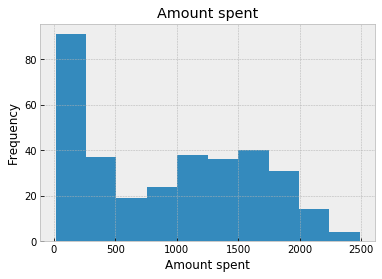

In [33]:
df['MntTotal'].hist(), plt.title('Amount spent'), plt.ylabel('Frequency'), plt.xlabel('Amount spent')
df['MntTotal'].describe()

In [34]:
amount_spend_class = pd.cut(df['MntTotal'], 20)
amount_spend_class.value_counts(normalize=True, sort=False).multiply(100).round(2)

(11.523, 137.85]     21.56
(137.85, 261.7]       5.69
(261.7, 385.55]       5.69
(385.55, 509.4]       5.39
(509.4, 633.25]       3.29
(633.25, 757.1]       2.40
(757.1, 880.95]       4.19
(880.95, 1004.8]      2.99
(1004.8, 1128.65]     5.99
(1128.65, 1252.5]     5.39
(1252.5, 1376.35]     5.39
(1376.35, 1500.2]     5.39
(1500.2, 1624.05]     6.29
(1624.05, 1747.9]     5.69
(1747.9, 1871.75]     3.59
(1871.75, 1995.6]     5.69
(1995.6, 2119.45]     2.69
(2119.45, 2243.3]     1.50
(2243.3, 2367.15]     0.60
(2367.15, 2491.0]     0.60
Name: MntTotal, dtype: float64

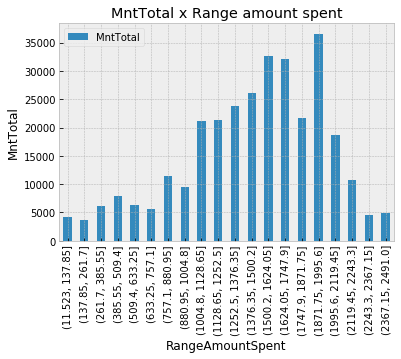

In [35]:
df['RangeAmountSpent'] = amount_spend_class
df[['RangeAmountSpent', 'MntTotal']].groupby(df['RangeAmountSpent']).sum().plot.bar(), 
plt.ylabel('MntTotal'), plt.title('MntTotal x Range amount spent');

In [36]:
round(df.query('MntTotal < 343')['MntTotal'].sum() / df['MntTotal'].sum(), 2)

0.04

#### Recency

In [37]:
df['Recency'].value_counts(bins=10, sort=False, normalize=True)

(-0.1, 9.9]     0.209581
(9.9, 19.8]     0.185629
(19.8, 29.7]    0.101796
(29.7, 39.6]    0.110778
(39.6, 49.5]    0.077844
(49.5, 59.4]    0.080838
(59.4, 69.3]    0.071856
(69.3, 79.2]    0.074850
(79.2, 89.1]    0.047904
(89.1, 99.0]    0.038922
Name: Recency, dtype: float64

#### Quantity of products purchased

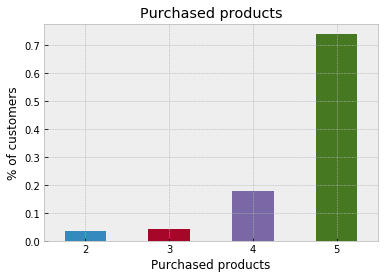

In [38]:
qty_of_products_purchased = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
                          .applymap(lambda x: 1 if x > 0 else 0)
                          .sum(axis=1)
)
(qty_of_products_purchased
 .value_counts(normalize=True)
 .sort_index()
 .plot
 .bar())
plt.xticks(rotation=0)
plt.xlabel("Purchased products")
plt.ylabel("% of customers")
plt.title('Purchased products');

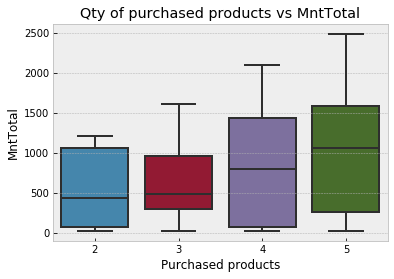

In [39]:
sns.boxplot(x=qty_of_products_purchased, y=df['MntTotal']), 
plt.xlabel("Purchased products"), plt.title('Qty of purchased products vs MntTotal');

#### Total children vs amount spent total and total purchases

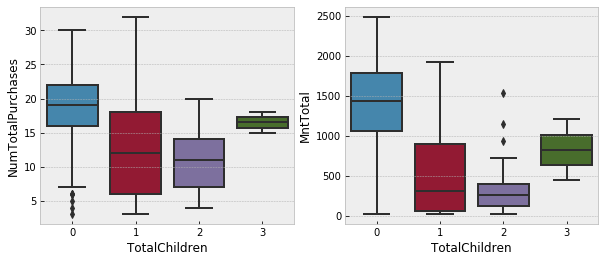

In [40]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(10,4))

sns.boxplot(x=df['TotalChildren'], y=df['NumTotalPurchases'], ax=ax)
sns.boxplot(x=df['TotalChildren'], y=df['MntTotal'], ax=ax1);

#### Income vs amount spent total and total purchases

Corr Income x NumTotalPurchases: 0.76
Corr Income x MntTotal: 0.84


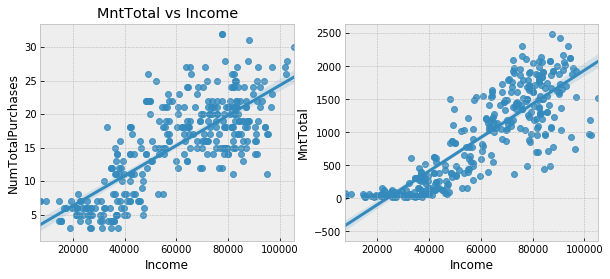

In [41]:
df_income_outliers_removed = df.query(f'Income < {income_upper_bound}')
corr_income_NumTotalPurchases = df_income_outliers_removed['Income'].corr(df_income_outliers_removed['NumTotalPurchases'])
corr_income_MntTotal = df_income_outliers_removed['Income'].corr(df_income_outliers_removed['MntTotal'])

cfig, (ax, ax1) = plt.subplots(1,2, figsize=(10,4))

sns.regplot(x=df_income_outliers_removed['Income'], y=df_income_outliers_removed['NumTotalPurchases'], ax=ax), ax.set_title('NumTotalPurchases vs Income')
sns.regplot(x=df_income_outliers_removed['Income'], y=df_income_outliers_removed['MntTotal'], ax=ax1), ax.set_title('MntTotal vs Income')
print(f"Corr Income x NumTotalPurchases: {corr_income_NumTotalPurchases:.2f}")
print(f"Corr Income x MntTotal: {corr_income_MntTotal:.2f}")